In [1]:
import requests
import re
from bs4 import BeautifulSoup
import json
import urllib

In [2]:
# s = "https://yandex.ru/maps/239/sochi/stops/stop__9973362/"
city_code = '239'
city_name = 'sochi'
stop = 'stop__9973362'

s0 = 'href="/maps/'+str(city_code)+'/'+city_name+'/routes/'

s = 'https://yandex.ru/maps/{}/{}/stops/{}/'.format(city_code, city_name, stop)

In [3]:
url = s

In [4]:
req = requests.get(url)
bs = BeautifulSoup(req.text, 'html.parser')

In [5]:
lst_links = bs.find_all('a')

In [6]:
lst_routes_links = []
route_names = []
titles = []
for link in lst_links:
    if s0 in str(link) and link.text != 'Маршруты':
        lst_routes_links.append('https://yandex.ru'+link.get('href'))
        route_names.append(link.text)
        titles.append(link.get('title'))
# 

In [7]:
url1 = lst_routes_links[0]

In [8]:
req = requests.get(url1)
bs = BeautifulSoup(req.text, 'html.parser')

In [9]:
scrpt = bs.find_all('script')[-2].text
js = json.loads(scrpt)

In [10]:
js['masstransitLine']['features'][0]['features'][-1]

{'coordinates': [39.773594992, 43.557614811],
 'id': 'stop__9973554',
 'name': 'Микрорайон Искра',
 'region': {'bounds': [[39.1261495, 43.261256799670214],
   [40.3199745, 43.908055799670215]],
  'hierarchy': [225, 10995, 239],
  'id': 239,
  'seoname': 'sochi'}}

In [11]:
bs.find_all('script')[-2].get("type") == "application/json"

True

In [14]:
all_scrpt = bs.find_all('script')
for scr in all_scrpt:
    if scr.get("type") == "application/json":
        print(all_scrpt.index(scr))
# 

12


In [16]:
str1 = 'остановка общественного транспорта'
str_qt = urllib.parse.quote(str1)

In [20]:
srch = "https://yandex.ru/maps/239/sochi/search/{}".format(str_qt)

In [21]:
req = requests.get(srch)
bs = BeautifulSoup(req.text, 'html.parser')

In [33]:
all_scrpt = bs.find_all("script")

In [34]:
all_scrpt = bs.find_all("script")
for scr in all_scrpt:
    if scr.get('type') == "application/json":
        print(all_scrpt.index(scr))

14


In [28]:
scr1 = all_scrpt[13].text
js2 = json.loads(scr1)

In [32]:
js2.keys()

dict_keys(['counters', 'hosts', 'locale', 'lang', 'tld', 'query', 'baseUrl', 'originalUrl', 'uatraits', 'cspNonce', 'origin', 'csrfToken', 'xscriptCsrfToken', 'isUserFromPortal', 'isUserFromGoogle', 'availableLangs', 'currencyCode', 'banner', 'staticHost', 'pageMode', 'bookmarks', 'clientErrors', 'searchResultsCount', 'enableTaxi', 'enableAvia', 'enableZapravkiPromo', 'iframeCounter', 'tnsCounter', 'cloudApi', 'blaBlaCarBanner', 'search', 'routes', 'feedback', 'font', 'advert', 'serviceName', 'bilet', 'share', 'mobile', 'servicePanel', 'apiManual', 'mapMargin', 'business', 'troubleshooting', 'passport', 'morda', 'ruler', 'ugcCabinet', 'advertLandingUrl', 'advertLandingMetroUrl', 'becomeAuthorUrl', 'becomeOwnerUrl', 'agreementUrl', 'metroAgreementUrl', 'rightHoldersUrl', 'ymapsUrlTemplate', 'mrcLandingUrl', 'reviews', 'enableRoutesB2B', 'routesB2BUrl', 'enableMobileDistribution', 'bannerLayout', 'pharmacyLinks', 'mapLocation', 'mapType', 'userRegion', 'experiments', 'layerLinks', 'layer

In [34]:
js2['searchPreloadedResults'].keys()

dict_keys(['requestId', 'requestSerpId', 'requestContext', 'requestQuery', 'requestCorrectedQuery', 'requestBounds', 'displayType', 'totalResultCount', 'requestResults', 'requestSkip', 'items', 'bounds', 'categories', 'filters', 'hasLavkaBanner'])

In [48]:
js2['searchPreloadedResults']['items'][1].keys()

dict_keys(['type', 'requestId', 'analyticsId', 'title', 'description', 'address', 'coordinates', 'displayCoordinates', 'bounds', 'logId', 'uri', 'id', 'metro', 'stops', 'panorama', 'shortTitle', 'fullAddress', 'country', 'status', 'businessLinks', 'ratingData', 'sources', 'categories', 'businessProperties', 'modularSnippet', 'seoname', 'geoId', 'compositeAddress', 'references', 'subtitleItems', 'region', 'breadcrumbs'])

In [53]:
js2['searchPreloadedResults']['items'][1]['description']

'Россия, Краснодарский край, Сочи, улица Конституции СССР'

# Способ поиска всех маршрутов в городе по названию

In [80]:
str_ct = 'Самара'
str_qt = urllib.parse.quote(str_ct)
srch_ct = "https://yandex.ru/maps/?text={}".format(str_qt)

In [81]:
req = requests.get(srch_ct)
bs = BeautifulSoup(req.text, 'html.parser')

In [83]:
alla = bs.find_all('a')
for aa in alla:
    cls = aa.get("class")
    try:
        if 'catalog-entry-point' in cls:
            hrf = aa.get("href")
            break
    except:
        pass
# 
try:
    city_id,city_name = hrf.split("maps/")[1].split("/catalog")[0].split("/")
except:
    city_id,city_name = None,None
    print("Error. Not found")
    pass
#


In [85]:
lnk_tp = "https://yandex.ru/maps/"+ str(city_id) + "/" + str(city_name) + "/transport"

In [96]:
def find_js(lnk):
    req = requests.get(lnk)
    bs = BeautifulSoup(req.text, 'html.parser')
    all_scrpt = bs.find_all("script")
    for scr in all_scrpt:
        if scr.get('type') == "application/json":
            sc_ind = all_scrpt.index(scr)
    # 
    scrp_txt = all_scrpt[sc_ind].text
    js = json.loads(scrp_txt)
    
    return js

In [105]:
js_tp = find_js(lnk_tp)

In [249]:
lst_lineid = []
lst_tpts = []
lst_names = []
i=0
for i in range(len(js_tp['vehicles'])):
    try:
        meta_veh = js_tp['vehicles'][i]['properties']['VehicleMetaData']['Transport']
        lineid = meta_veh['lineId']
        if lineid not in lst_lineid:
            lst_lineid.append(lineid)
            answ_line = 1
        else:
            answ_line = 0
        try:
            transp_type = meta_veh['type']
            name_rt = meta_veh['name']
        except:
            transp_type,name_rt = None,None
        if answ_line == 1:
            lst_tpts.append(transp_type)
            lst_names.append(name_rt)
        # 
    except:
        pass
# 

In [277]:
dct_lnks = {}
i=0
# for i in range(len(lst_lineid)):
for i in range(5):
    lnkid = lst_lineid[i]
    lnk_rt = 'https://yandex.ru/maps/{}/{}/routes/{}'.format(city_id, city_name, lnkid)
    js_rt = find_js(lnk_rt)
    dct_lnks[lnkid] = js_rt['masstransitLine']['features']
# 

In [278]:
dct_lnks.keys()

dict_keys(['2193179075', '2193179452', '2193179408', '2193179080', '2193179401'])

In [280]:
len(dct_lnks['2193179075'])

2

In [ ]:
# one_rt[0]['properties']['ThreadMetaData']['EssentialStops']

In [ ]:
# for elem in dct_lnks:
#     frw = elem[0]
#     if len(elem) == 2:
#         bckw = elem[1]
#     else:
#         bckw = None
# # 

In [281]:
one_rt = dct_lnks['2193179075']

In [305]:
one_dir = one_rt[0]['features']

In [ ]:
def get_stop(dct):
    lst=[]
    stop_id = dct['id']
    name = dct['name']
    stop_lon = dct['coordinates'][0]
    stop_lat = dct['coordinates'][1]
    lst = [stop_id,name,stop_lat,stop_lon]
    return lst

In [334]:
direction = 0
rt_id = '2193179075'
all_stops=[]
rt_line=[]
i=0
lst_stop=[]
cnt_stp = 0
for i in range(len(one_dir)):
    if 'id' in one_dir[i]:
        cnt_stp +=1
        lst_stop = []
        lst_stop = lst_stop + [rt_id,direction,cnt_stp]
        lst_stop = lst_stop + get_stop(one_dir[i])
        all_stops.append(lst_stop)
        
    if 'points' in one_dir[i]:
        one_part = one_dir[i]['points']
        for j in range(len(one_part)):
            rt_line.append(one_part[j])
    #
# 

In [336]:
import pandas as pd

In [341]:
import shapely
from shapely.geometry import Point, LineString, MultiLineString

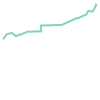

In [342]:
LineString(rt_line)

In [ ]:
# "https://yandex.ru/maps/51/samara/transport/buses/?l=masstransit&ll=50.212459%2C53.227108&z=11"

In [ ]:
# https://yandex.ru/maps/51/samara/transport/?ll=50.183735%2C53.233963&z=10